In [1]:
# 한글 폰트
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
soccer = pd.read_csv('Final_Data_update.csv', encoding='euc\kr')         # 데이터
soccer_nm = pd.read_csv('Final_Data_normalize.csv', encoding='euc\kr')   # 정규화된 데이터
soccer_copy = soccer.copy()                                              # 데이터 복사

In [3]:
# 뉴캐슬의 열시즌 데이터
mred_nor = soccer_nm.loc[soccer_nm.Team == '뉴캐슬']
mred_nor = mred_nor.sort_values('season')
mred = soccer.loc[soccer.Team == '뉴캐슬']
mred = mred.sort_values('season')
mred

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season,goal_gain_lose_gap,Total_shots,Valid_shots,Goal_ratio(%),Valid_shot_ratio(%),Shot_accuracy(%)
11,뉴캐슬,10,49,43,59,-22.07,26.2,2013-2014,-16,373,176,11.5,47.184987,24.431818
31,뉴캐슬,15,39,40,63,21.15,25.6,2014-2015,-23,295,145,13.6,49.152542,27.586207
50,뉴캐슬,18,37,44,65,102.48,25.2,2015-2016,-21,292,160,15.1,54.794521,27.500000
92,뉴캐슬,10,44,39,47,25.28,25.5,2017-2018,-8,319,151,12.2,47.335423,25.827815
114,뉴캐슬,13,45,42,48,8.70,26.6,2018-2019,-6,320,147,13.1,45.937500,28.571429
132,뉴캐슬,13,44,38,58,37.26,26.5,2019-2020,-20,323,235,11.8,72.755418,16.170213
153,뉴캐슬,12,45,46,62,38.48,27.1,2020-2021,-16,531,390,8.7,73.446328,11.794872
173,뉴캐슬,11,49,44,62,130.50,27.4,2021-2022,-18,612,440,7.2,71.895425,10.000000
194,뉴캐슬,4,71,68,33,171.29,27.0,2022-2023,35,692,509,9.8,73.554913,13.359528


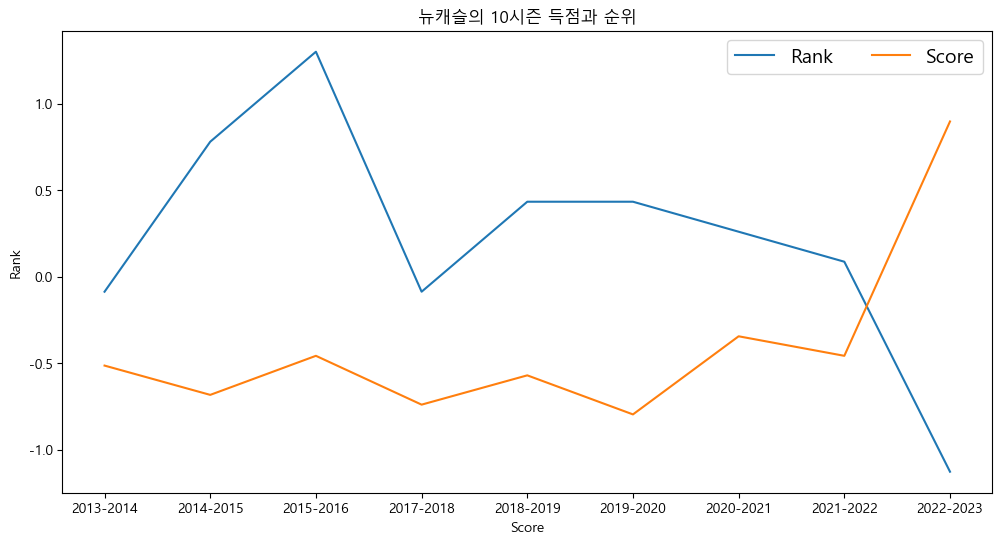

In [4]:
# 뉴캐슬의 10시즌 득점과 순위 (정규화된 데이터)
plt.figure(figsize = (12,6))
sns.lineplot(data = mred_nor, x = 'season', y = 'Rank', label = 'Rank')
sns.lineplot(data = mred_nor, x = 'season', y = 'Score', label = 'Score')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.xlabel('Score',loc='center')
plt.ylabel('Rank', loc = 'center')
plt.title('뉴캐슬의 10시즌 득점과 순위',loc='center')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.show()

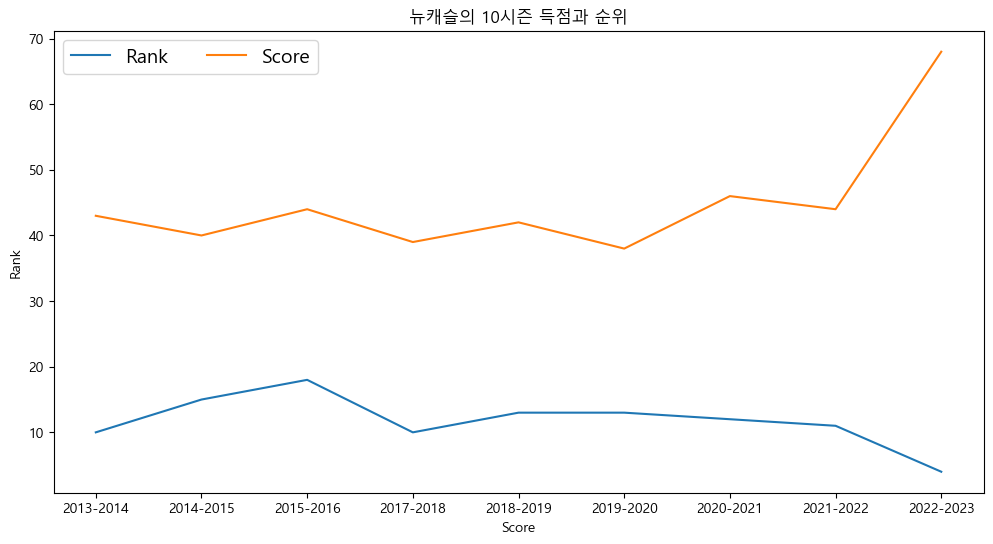

In [5]:
# 정규화 전 데이터
plt.figure(figsize = (12,6))
sns.lineplot(data = mred, x = 'season', y = 'Rank', label = 'Rank')
sns.lineplot(data = mred, x = 'season', y = 'Score', label = 'Score')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.xlabel('Score',loc='center')
plt.ylabel('Rank', loc = 'center')
plt.title('뉴캐슬의 10시즌 득점과 순위',loc='center')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.show()

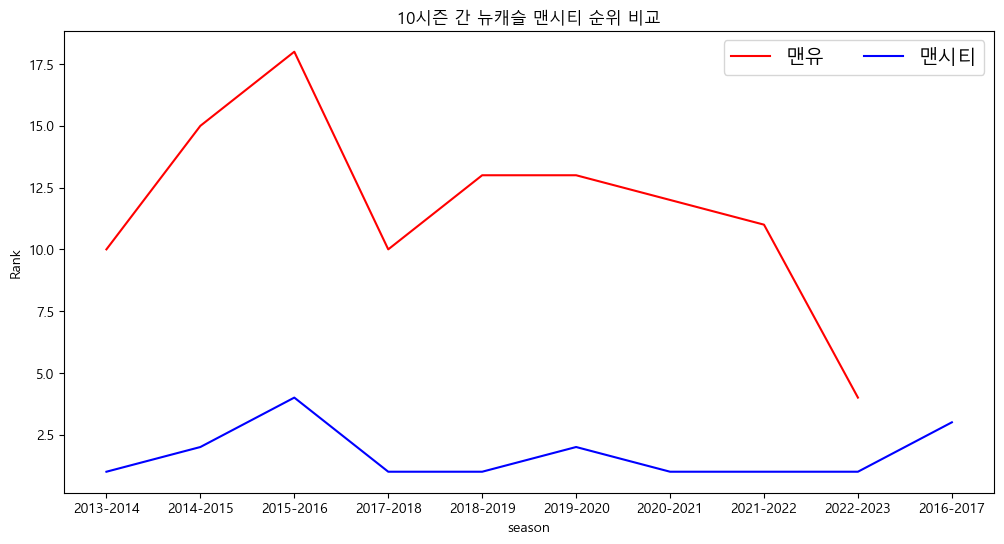

In [7]:
# 10시즌 간 시즌별 뉴캐슬과 맨시티 순위 비교
mblue_nor= soccer_nm.loc[soccer_nm.Team == '맨시티']
mblue_nor = mblue_nor.sort_values('season')
mblue = soccer.loc[soccer.Team == '맨시티']
mblue = mblue.sort_values('season')
plt.figure(figsize = (12,6))
sns.lineplot(data = mred, x = 'season', y = 'Rank', label = '맨유', color='red' )
sns.lineplot(data = mblue, x = 'season', y = 'Rank', label = '맨시티', color='blue')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.title('10시즌 간 뉴캐슬 맨시티 순위 비교')
plt.show()

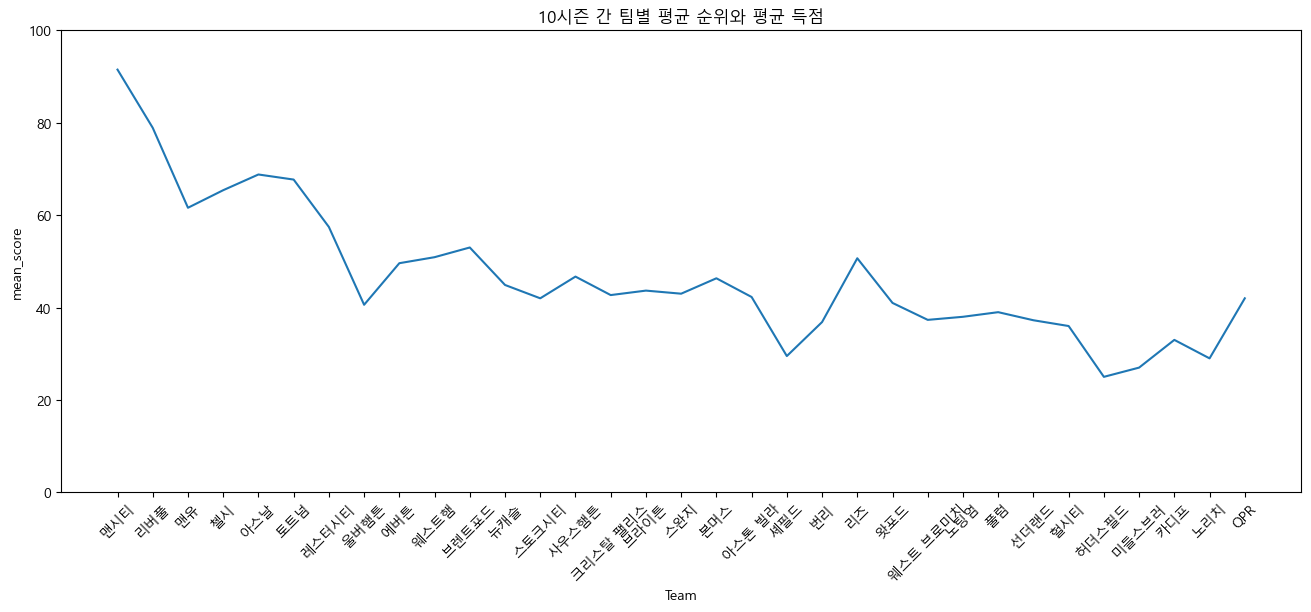

In [8]:
# 10시즌간 팀별 평균 순위와 평균 득점
team_score_rank= soccer_copy.groupby('Team').agg(mean_score = ('Score', 'mean'),    # 'Team'으로 묶어서 평균 득점과 평균 순위 변수 만들기
                                                 mean_rank = ('Rank', 'mean'))
team_score_rank = team_score_rank.sort_values('mean_rank', ascending=True)          # 순위 순으로 순서 정리
team_score_rank
plt.figure(figsize = (16,6))
sns.lineplot(data = team_score_rank, x = 'Team', y = 'mean_score')
plt.ylim(0,100)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 득점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


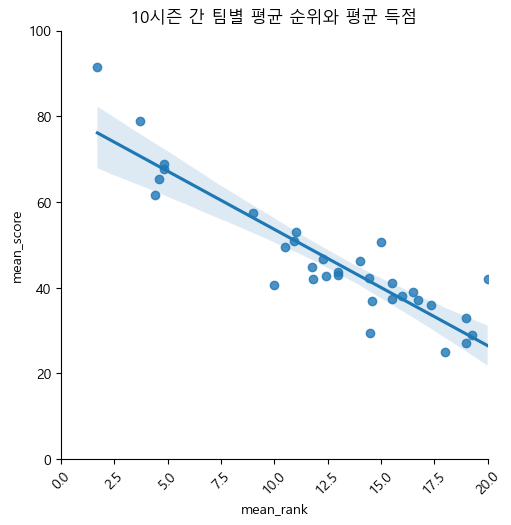

In [9]:
sns.lmplot(data = team_score_rank, x = 'mean_rank', y = 'mean_score')
plt.xlim(0,20)
plt.ylim(0,100)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 득점')
plt.show()

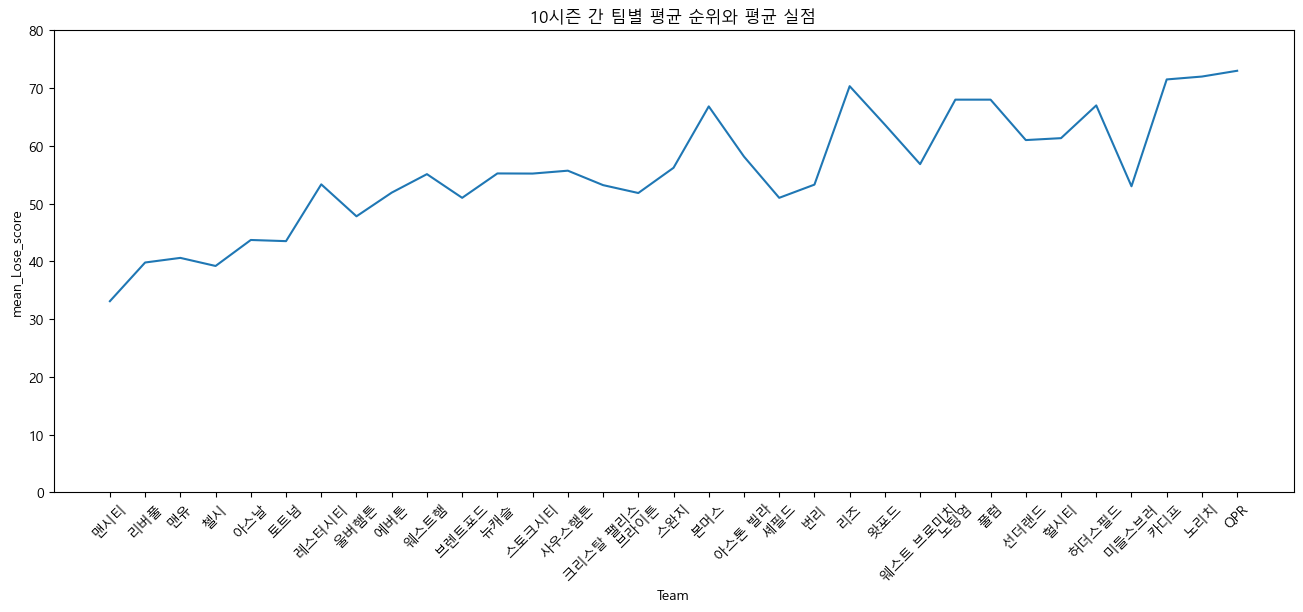

In [10]:
# 10시즌간 팀별 평균 순위와 평균 실점
team_Lose_score_rank= soccer_copy.groupby('Team').agg(mean_Lose_score = ('Lose_score', 'mean'),       # 평균 실점과 평균 순위 데이터 만들기
                                                      mean_rank = ('Rank', 'mean'))
team_Lose_score_rank = team_Lose_score_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_Lose_score_rank, x = 'Team', y = 'mean_Lose_score')
plt.ylim(0,80)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 실점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

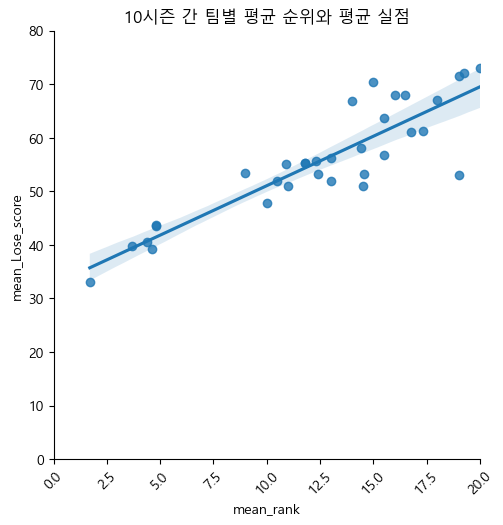

In [11]:
plt.figure(figsize = (16,6))
sns.lmplot(data = team_Lose_score_rank, x = 'mean_rank', y = 'mean_Lose_score')
plt.xlim(0,20)
plt.ylim(0,80)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 실점')
plt.show()

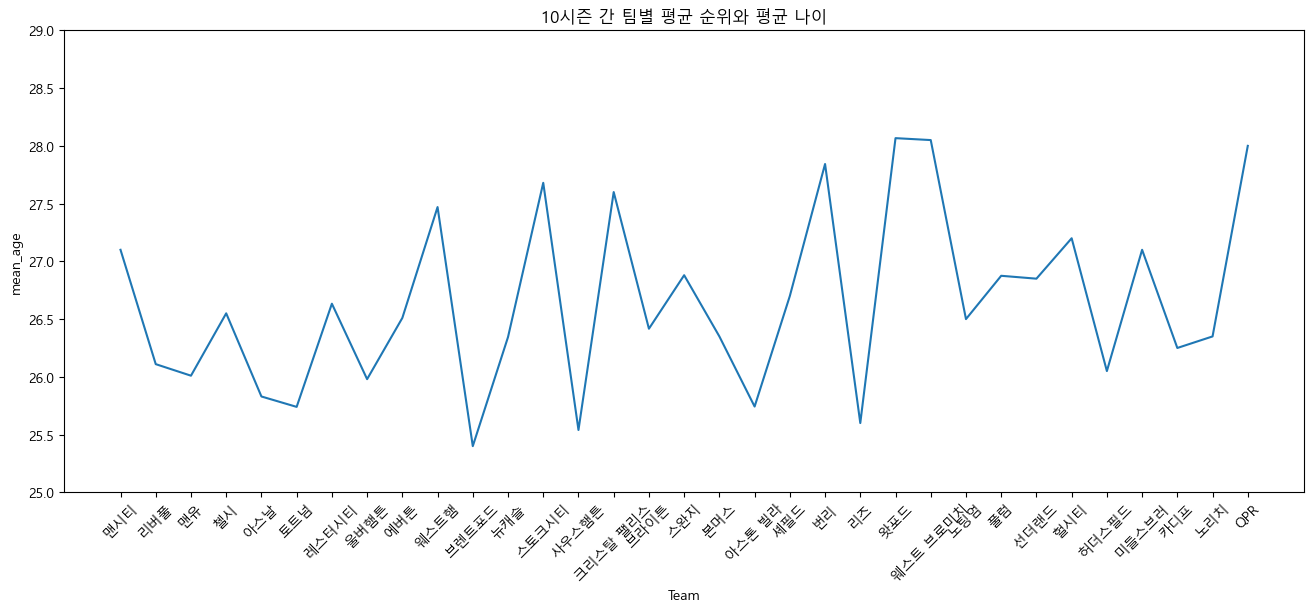

In [12]:
# 10시즌간 팀별 평균 순위와 평균 나이
team_age_rank= soccer_copy.groupby('Team').agg(mean_age = ('AverageAge', 'mean'),
                                                 mean_rank = ('Rank', 'mean'))
team_age_rank = team_age_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_age_rank, x = 'Team', y = 'mean_age')
plt.xticks(rotation = 45)
plt.ylim(25,29)
plt.title('10시즌 간 팀별 평균 순위와 평균 나이')
plt.show()

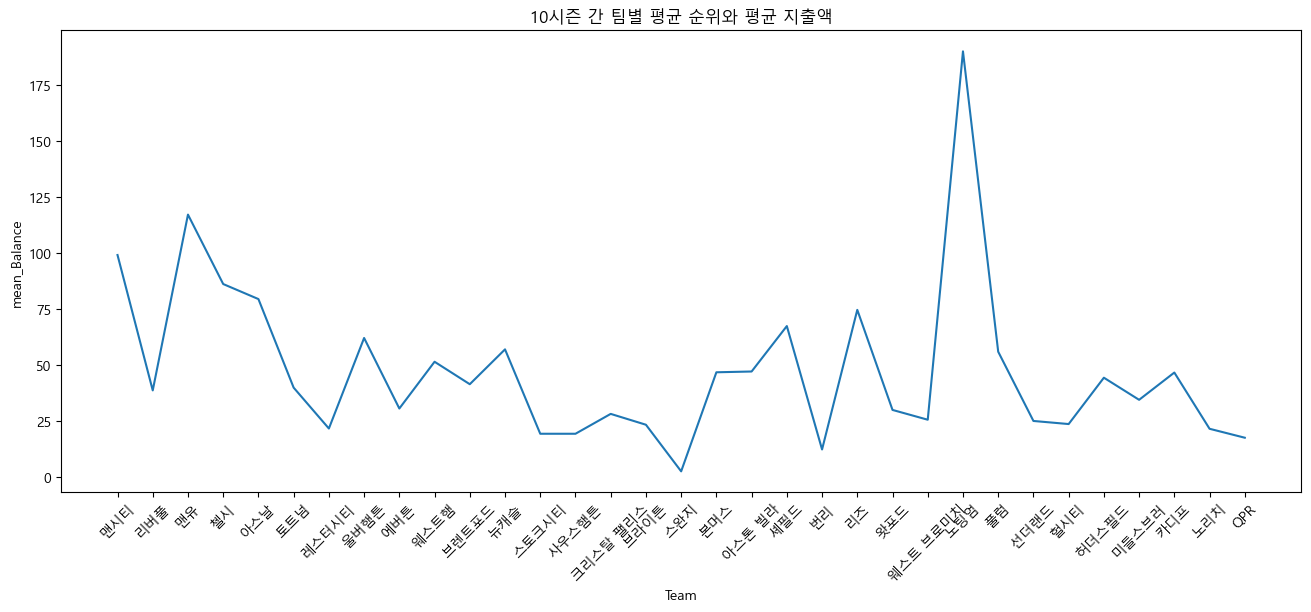

In [13]:
# 10시즌간 팀별 평균 순위와 평균 지출액
team_Balance_rank= soccer_copy.groupby('Team').agg(mean_Balance = ('Balance(m)', 'mean'),
                                                 mean_rank = ('Rank', 'mean'))
team_Balance_rank = team_Balance_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_Balance_rank, x = 'Team', y = 'mean_Balance')
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 지출액')
plt.show()

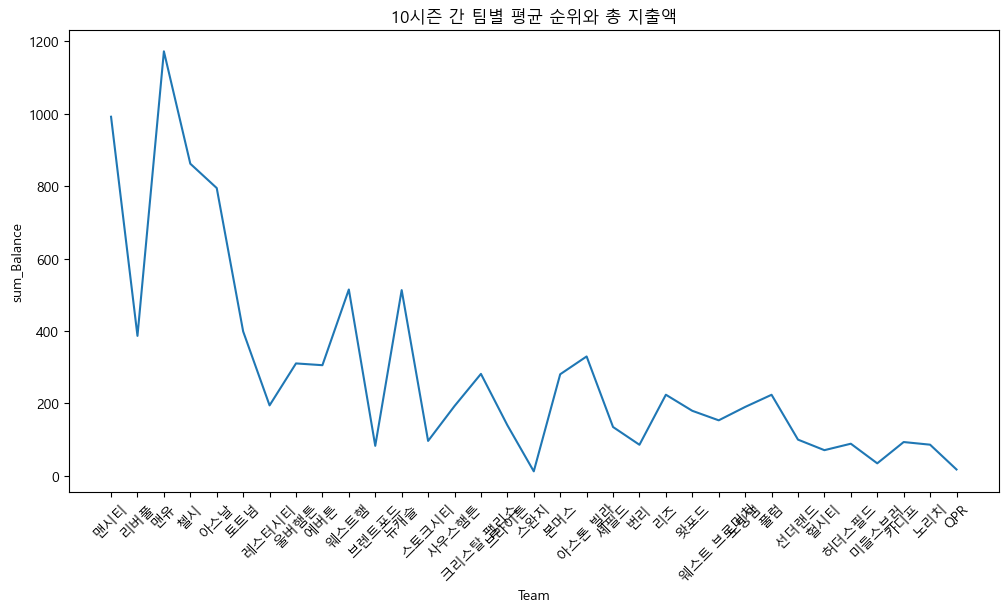

In [14]:
# 10시즌간 팀별 평균 순위와 총 지출액
team_Balance_rank= soccer_copy.groupby('Team').agg(sum_Balance = ('Balance(m)', 'sum'),
                                                 mean_rank = ('Rank', 'mean'))
team_Balance_rank = team_Balance_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (12,6))
sns.lineplot(data = team_Balance_rank, x = 'Team', y = 'sum_Balance')
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 총 지출액')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

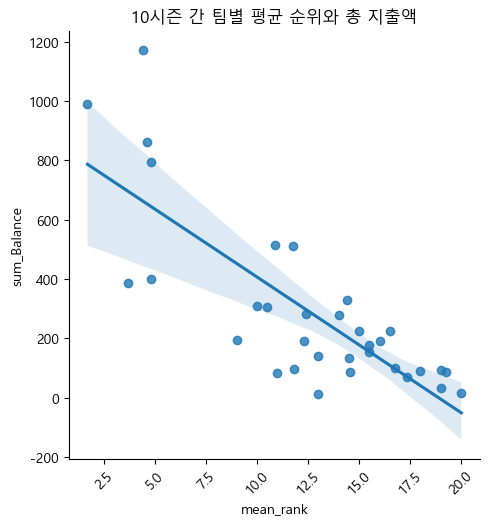

In [18]:
plt.figure(figsize = (16,6))
sns.lmplot(data = team_Balance_rank, x = 'mean_rank', y = 'sum_Balance')
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 총 지출액')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

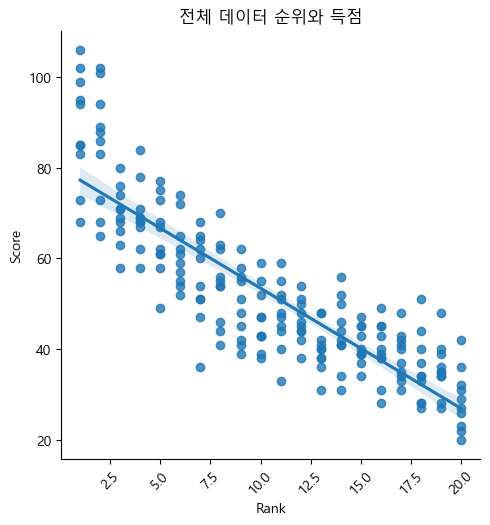

In [19]:
# 전체 데이터 순위와 득점
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'Score')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 득점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

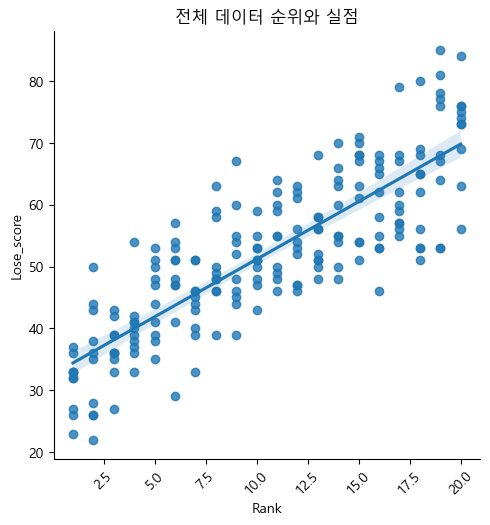

In [21]:
# 전체 데이터 순위와 실점
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'Lose_score')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 실점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

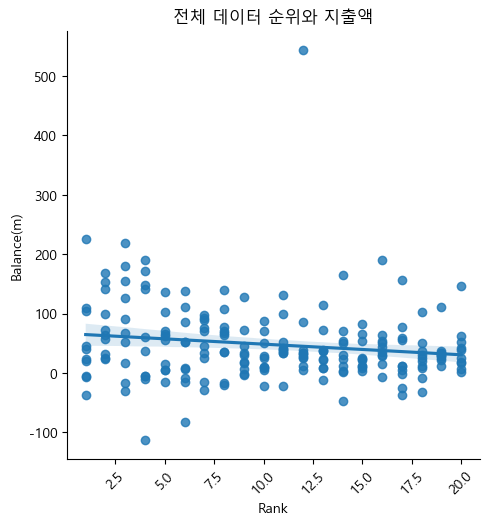

In [20]:
# 전체 데이터 순위와 지출액
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'Balance(m)')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 지출액')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

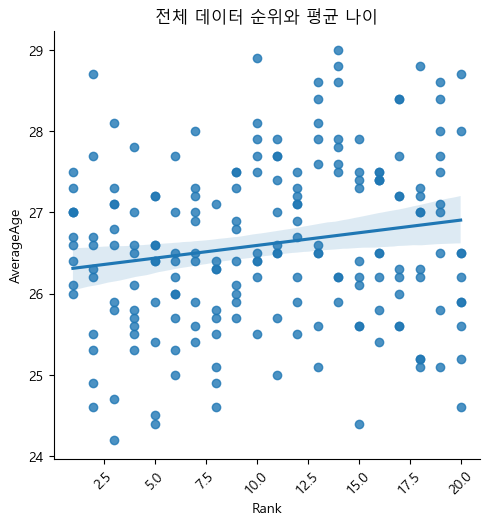

In [22]:
# 전체 데이터 순위와 평균 나이
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'AverageAge')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 평균 나이')
plt.show()